In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

In [3]:
df = pd.read_csv('/content/Bank-Treated.csv', sep=';')
df.sample(5)


,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
8068,56,services,married,other,no,no,telephone,jun,mon,393.0,2,0,1.4,94.465,-41.8,4.865,5228.1,no
13487,46,admin.,divorced,university.degree,yes,yes,telephone,jul,thu,73.0,1,0,1.4,93.918,-42.7,4.963,5228.1,no
7043,33,other,single,university.degree,no,no,telephone,may,thu,365.0,2,0,1.1,93.994,-36.4,4.860,5191.0,no
2394,37,blue-collar,married,professional.course,no,no,telephone,may,tue,128.0,2,0,1.1,93.994,-36.4,4.856,5191.0,no
31304,36,blue-collar,married,basic.9y,no,no,cellular,may,wed,133.0,1,0,-1.8,92.893,-46.2,1.334,5099.1,no


In [4]:
df.drop(['emp.var.rate', 'nr.employed'], axis = 1, inplace=True)

Dropping emp.var.rate and nr.employed

In [5]:
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,other,married,other,no,no,telephone,may,mon,261.0,1,0,93.994,-36.4,4.857,no
1,57,services,married,high.school,no,no,telephone,may,mon,149.0,1,0,93.994,-36.4,4.857,no
2,37,services,married,high.school,yes,no,telephone,may,mon,226.0,1,0,93.994,-36.4,4.857,no
3,40,admin.,married,other,no,no,telephone,may,mon,151.0,1,0,93.994,-36.4,4.857,no
4,56,services,married,high.school,no,yes,telephone,may,mon,307.0,1,0,93.994,-36.4,4.857,no


In [6]:
bank_num_features = list(df.select_dtypes(include = ['int64', 'float64']).columns)
print(bank_num_features)
bank_cat_features = list(df.select_dtypes(include = ['object']).columns)
print(bank_cat_features)

['age', 'duration', 'campaign', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']
['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'y']


Looking for the numerical and categorical variable names

In [7]:
bank_cat_features.remove('y')
bank_cat_features

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week']

**Preparing the Data**

In [8]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

**Using Label Encoder from SkLearn**

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for feature in bank_cat_features:
    df[feature] = le.fit_transform(df[feature])
    
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,3,1,2,0,0,1,6,1,261.0,1,0,93.994,-36.4,4.857,no
1,57,4,1,1,0,0,1,6,1,149.0,1,0,93.994,-36.4,4.857,no
2,37,4,1,1,1,0,1,6,1,226.0,1,0,93.994,-36.4,4.857,no
3,40,0,1,2,0,0,1,6,1,151.0,1,0,93.994,-36.4,4.857,no
4,56,4,1,1,0,1,1,6,1,307.0,1,0,93.994,-36.4,4.857,no


In [11]:
df['y'] = le.fit_transform(df['y'])
df.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,3,1,2,0,0,1,6,1,261.0,1,0,93.994,-36.4,4.857,0
1,57,4,1,1,0,0,1,6,1,149.0,1,0,93.994,-36.4,4.857,0
2,37,4,1,1,1,0,1,6,1,226.0,1,0,93.994,-36.4,4.857,0
3,40,0,1,2,0,0,1,6,1,151.0,1,0,93.994,-36.4,4.857,0
4,56,4,1,1,0,1,1,6,1,307.0,1,0,93.994,-36.4,4.857,0


In [12]:
y = df.pop('y')
X = df[bank_cat_features]

In [13]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [14]:
X.head()

,job,marital,education,housing,loan,contact,month,day_of_week
0,3,1,2,0,0,1,6,1
1,4,1,1,0,0,1,6,1
2,4,1,1,1,0,1,6,1
3,0,1,2,0,0,1,6,1
4,4,1,1,0,1,1,6,1


**Train and Test Split**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 50) 

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((30123, 8), (30123,), (10042, 8), (10042,))

**Logistic Regression**

In [61]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")
     

Training complete.


In [17]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [57]:
# Fit the model to the training data
log_reg.fit(X_train, y_train)


LogisticRegression()

In [58]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() # initialize the model
logreg.fit(X_train, y_train) # fit the model
y_pred = logreg.predict(X_test) # predict


In [59]:
from sklearn.linear_model import LinearRegression
import numpy as np

# prepare data
X = np.array([[40], [50], [60], [70]])
y = np.array([1, 2, 3, 4])

# fit the model
regression = LinearRegression()
regression.fit(X, y)

# predict a single value
prediction = regression.predict([[60]])
print("Prediction:", prediction[0])


Prediction: 3.0


In [60]:
from sklearn.metrics import recall_score

# Make predictions on the test set using the fitted logistic regression model
y_pred = log_reg.predict(X_test)

# Calculate the recall score
recall = recall_score(y_test, y_pred)

print("Recall score:", recall)


Recall score: 0.0


In [47]:
predictions = logmodel.predict(X_test)
classification_report(y_test,predictions)

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.90      1.00      0.95      8997\n           1       0.00      0.00      0.00      1045\n\n    accuracy                           0.90     10042\n   macro avg       0.45      0.50      0.47     10042\nweighted avg       0.80      0.90      0.85     10042\n'

In [48]:
confusion_matrix(y_test,predictions)

array([[8997,    0],
       [1045,    0]])

In [49]:
accuracy_score(y_test,predictions)

0.8959370643298148

In [50]:
f1_score(y_test,predictions)

0.0

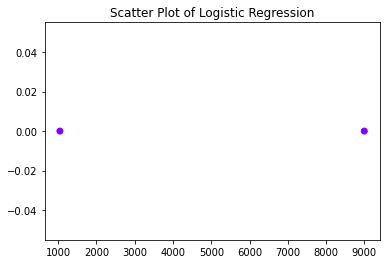

In [51]:
x = [8997, 1045]
y = [0, 0]
plt.scatter(x, y, c=y, cmap='rainbow', label=y)
plt.title('Scatter Plot of Logistic Regression')
plt.show()


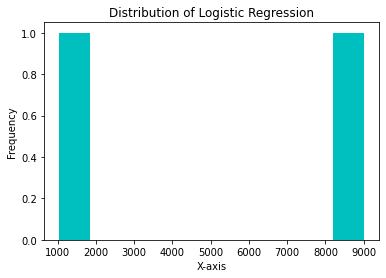

In [52]:
x = [8997, 1045]

plt.hist(x, bins=10, color='c')
plt.title('Distribution of Logistic Regression')
plt.xlabel('X-axis')
plt.ylabel('Frequency')
plt.show()

In [ ]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

       job  marital  education  housing  loan  contact  month  day_of_week
21250    0        1          3        0     0        0      1            1
36646    0        2          4        0     0        0      4            1
6455     1        2          0        0     0        1      6            4
8200     4        1          1        0     1        1      4            3
4830     1        0          0        1     0        1      6            4
...    ...      ...        ...      ...   ...      ...    ...          ...
36353    1        1          3        1     0        0      4            4
11788    3        1          2        1     0        1      4            0
23304    0        1          4        1     0        0      1            4
25037    4        1          0        0     0        0      7            3
34943    0        2          1        1     0        0      6            0

[10042 rows x 8 columns]


In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
21250,0,0.135100
36646,0,0.172567
6455,1,0.067472
8200,0,0.035297
4830,0,0.018248
...,...,...
36353,0,0.146349
11788,0,0.036920
23304,0,0.149748
25037,0,0.123855


**Evaluating the Model**

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
     

Mean Absolute Error: 0.18308214642397883
